In [167]:
"""
Final Project: Cardinals
Author: Zach Grasso
Task 1: The top 12 players overall, and how they compare to the 12 players    listed on the dataset website (found by using a WAR score)

"""
### Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import main
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [168]:
#Task 1: The top 12 players overall found using a WAR score
roster_file = 'data/roster.csv'
roster = main.get_data(roster_file)

roster.sort_values(by=['WAR'], ascending=False, inplace=True)
#print the top 12 results with name and WAR score
print(roster[['Name', 'WAR']].head(12))


                 Name  WAR
35      Tyler O'Neill  6.3
16   Paul Goldschmidt  6.1
0       Nolan Arenado  4.1
1      Harrison Bader  3.9
46    Adam Wainwright  3.7
8         Tommy Edman  3.7
3       Dylan Carlson  3.2
43       Edmundo Sosa  3.2
31      Yadier Molina  1.8
6         Paul DeJong  1.6
22     Kwang Hyun Kim  1.2
13  Giovanny Gallegos  1.1


<BarContainer object of 12 artists>

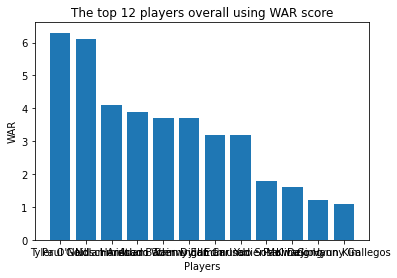

In [169]:
# Task 1: Using matplotlib plot the top 12 players overall
roster.sort_values(by=['WAR'], ascending=False, inplace=True)
# plot the top 12 players overall
labels = roster.Name.values[0:12]
values = roster.WAR.values[0:12]
plt.title(label= "The top 12 players overall using WAR score")
plt.xlabel("Players")
plt.ylabel("WAR")
plt.bar(labels, values)

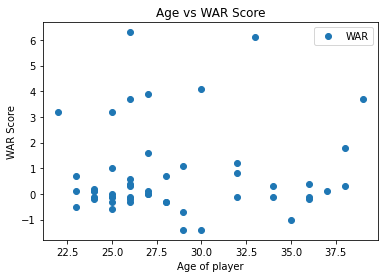

In [170]:
# Task 5: Determining if a player's performance is directly proportional to their age
#use linear regression on age and WAR of roster
linear = roster[['Age', 'WAR']].copy(deep=True)

linear.plot(x='Age', y='WAR', style='o')
plt.title('Age vs WAR Score')
plt.xlabel('Age of player')
plt.ylabel('WAR Score')
plt.show()


In [171]:
#Age
x = linear.iloc[:, :-1].values
#War Score
y = linear.iloc[:, 1].values

#splits the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regression = LinearRegression()
regression.fit(x_train, y_train)
y_pred = regression.predict(x_test)

predicted_age = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#print(predicted_age)

# Get the accuracy of the model
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))
print(linear.describe())
print('Accuracy:', sklearn.metrics.r2_score(y_test, y_pred))

# The root Mean Squared Error is the most important metric for determining the accuracy of a model.
# The root mean squared error is considerably higher then the mean of the original data. Meaning that the model is not very accurate. Thus the data is not linear. And is nota good correlation of age and performance.

Mean Absolute Error: 1.252489462132182
Mean Squared Error: 2.6408309666885823
Root Mean Squared Error: 1.6250633731299782
             Age        WAR
count  51.000000  51.000000
mean   28.470588   0.745098
std     4.644795   1.715496
min    22.000000  -1.400000
25%    25.000000  -0.150000
50%    27.000000   0.100000
75%    32.000000   0.900000
max    39.000000   6.300000
Accuracy: -0.1658659769750379


In [172]:
# create a decision tree for age and WAR
from sklearn.tree import DecisionTreeRegressor

decTree = roster[['Age', 'G', 'OF','Yrs']].copy()
X_train, X_test, y_train, y_test = train_test_split(decTree, roster['WAR'], test_size = 0.25, random_state = 1)

clf_model = DecisionTreeRegressor(random_state=1)
clf_model.fit(X_train, y_train)
#y_predict = clf_model.predict(x_test)

print('Accuracy:', clf_model.score(X_test, y_test))

Accuracy: 0.497305231793883


In [173]:
# attempt to print decision tree

from sklearn.tree import export_graphviz

export_graphviz(clf_model, out_file='tree.dot', feature_names=['Age', 'G', 'OF', 'Yrs'],)

